# **PersonalBudget** Class Breakdown

### Gobal Dependencies: yaml, datetime, pandas, matplotlib, recurrent, dateutil
### Local Dependencies: #TODO: Add FinancialVisuals and other Dependencies

..............# TODO: Add brief Class description

## 1a) Initialize: __init__() Definition
..............# TODO: Add brief description
### I) Inputs:
        - start_date, yaml_file

In [ ]:
    def __init__(self,start_date,yaml_file):
        '''Initialize the Personal Budget with your cash flow file'''

        # Get Start and End Date
        self.today = pd.Timestamp(start_date[0],
                                  start_date[1],
                                  start_date[2]).normalize()

        self.end   = self.today + datetime.timedelta(days=365)

        # Load Cash flow yaml file.
        # TODO: Add Gui for File Selection & Add Excel Import
        with open(yaml_file) as file:
            self.budget = yaml.load(file)

        #initialize Calender
        self.frequency = 0
        self.amount = 0
        self.dates = 0
        self.calendar = pd.DataFrame(index=pd.date_range
                                    (start=self.today,
                                     end=self.end))

        # Build the Calender
        self.build_calendar()
        #print(self.calendar.head(35))

## 1b) Initialize: __init__() Demonstration

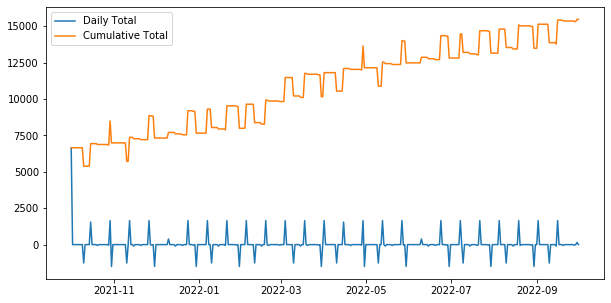

In [1]:
from PersonalBudget import PersonalBudget

yaml_file = 'personal_budget.yaml'
budget_start = [2021,10,1]
my_budget = PersonalBudget(budget_start,yaml_file)
my_budget.plot_budget()

### Function Definition:  **get_dates()** 
..............# TODO: Add brief description
### I) Inputs:
        - start_date, yaml_file
